# Intro to Julia

## Basic Math

In [1]:
a = 2 # Int
b = 3.0  # Float
@show c = b + a * im # Complex

@show typeof(a)
@show typeof(b)
@show typeof(c)

add(x, y, z) = x + y + z

add(a, b, real(c))

c = b + a * im = 3.0 + 2.0im
typeof(a) = Int64
typeof(b) = Float64
typeof(c) = Complex{Float64}


8.0

## Working with Arrays

In [2]:
# Generate a 4x5 array of random ints between 1 and 20
@show A = rand(1:20, 4, 5)

# Get the last 2 rows
@show A[end-1:end, :]

# Generate a 6x5 random array
B = rand(1:5, 6, 5)

# Multiply the two
@show C = A * B'

# Apply function element wise
sin.(C)

A = rand(1:20, 4, 5) = [19 9 17 10 7; 4 7 6 10 18; 13 8 3 16 16; 4 15 9 7 2]
A[end - 1:end, :] = [13 8 3 16 16; 4 15 9 7 2]
C = A * B' = [190 186 151 198 102 176; 161 136 71 156 103 121; 184 180 91 205 117 178; 108 104 72 131 47 133]


4×6 Array{Float64,2}:
  0.997799  -0.602024  0.20215   -0.0795786   0.994827  0.0707522
 -0.702408  -0.790433  0.951055  -0.881785    0.622989  0.998815 
  0.976584  -0.801153  0.105988  -0.714898   -0.689698  0.877575 
  0.926819  -0.321622  0.253823  -0.811603    0.123573  0.868966 

# Plotting

In [3]:
using Plots, Interact
gr()

┌ Info: Recompiling stale cache file /Users/amrit/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1187
┌ Info: Precompiling Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1189


HTML{String}("    <script id=\"webio-setup-18341162641139527989\">\n    // Immediately-invoked-function-expression to avoid global variables.\n    (function() {\n        var warning_div = document.getElementById(\"webio-warning-8351826865840529645\");\n        var hide = function () {\n            var script = document.getElementById(\"webio-setup-18341162641139527989\");\n            var parent = script && script.parentElement;\n            var grandparent = parent && parent.parentElement;\n            if (grandparent) {\n                grandparent.style.display = \"none\";\n            }\n            warning_div.style.display = \"none\";\n        };\n        if (window.require && require.defined) {\n            // Jupyter notebook.\n            if (require.defined(\"nbextensions/webio/main\")\n                    || require.defined(\"/assetserver/658ba0fd6b596ca41864874911e100f30acc7050-dist/main.js\")) {\n                // Extension already loaded.\n                hide();\n                return;\n            }\n            console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n            require([\"/assetserver/658ba0fd6b596ca41864874911e100f30acc7050-dist/main.js\"], function (webIOModule) {\n                webIOModule.load_ipython_extension();\n            });\n            warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n        } else if (window.location.pathname.includes(\"/lab\")) {\n            // Guessing JupyterLab\n            warning_div.innerHTML = \"WebIO does not support JupyterLab yet.\";\n        }\n    })();\n    </script>\n    <div\n        id=\"webio-warning-8351826865840529645\"\n        class=\"output_text output_stderr\"\n        style=\"padding: 1em; font-weight: bold;\"\n    >\n        Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n        <!-- TODO: link to installation docs. -->\n    </div>\n")

Plots.GRBackend()

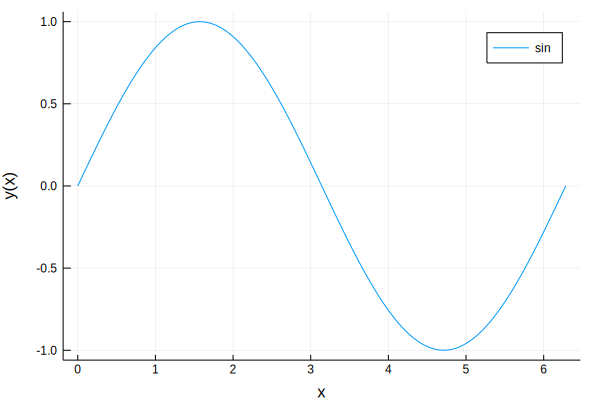

In [4]:
#x = linspace(0,2*pi,100)
x = range(0, stop=2*pi, length=100)
y = sin.(x)
plot(x,y,label="sin",xlabel="x",ylabel="y(x)")

In [5]:
@manipulate for f in [sin,cos,tan]
    y = f.(x)
    scatter(x,y,label="$f",xlabel="x",ylabel="$(f)(x)")
end

# Building Neural Networks

In [17]:
using Flux, Flux.Data.MNIST
using Flux: onehotbatch, argmax, crossentropy, throttle, mse
using Base.Iterators: repeated, partition

## Basic Linear Regression

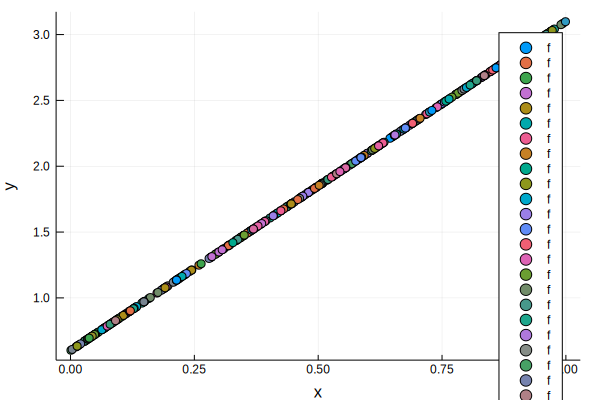

In [81]:
#X = range(-100, stop=100, step=0.5)
X = rand(1, 400)
Y = 2.5 .* X .+ 0.6
#Y = Y + (rand(400) .* 20 .- 1)
scatter(X,Y,label="f",xlabel="x",ylabel="y")

In [78]:
Xtr = X'
Ytr = Y'
loss_fn = mse
iters = 50
m = Chain(Dense(1, 1))
loss(x, y) = loss_fn(m(x), y)
evalcb = () -> @show([loss(X,Y)])
dataset = Base.Iterators.repeated((Xtr, Ytr), iters)
opt = ADAM(params(m)) 
Flux.train!(loss, dataset, opt, cb = throttle(evalcb, 0.1))
params(m)

DimensionMismatch: DimensionMismatch("matrix A has dimensions (1,1), vector B has length 401")

generatedata_circle (generic function with 2 methods)